<a href="https://colab.research.google.com/github/Kiksecret/Basic_Tensorflow/blob/main/Basic_TensorFlow_with_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


#การทำ Text Classification สำหรับการคัดแยกข้อความเป็นข้อความประชดประชันหรือไม่ 


ดาวน์โหลด:

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

import json

with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

In [ ]:
import numpy as np

sentences = []
labels = []
urls = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences  = sentences[training_size:]
print(len(testing_sentences))

training_labels = np.array(labels[0:training_size])
testing_labels  = np.array(labels[training_size:])
print(len(testing_labels))

6709
6709


## Hyper-parameters for modeling

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

## Modeling:



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type,
                                truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                                maxlen=max_length, 
                                padding=padding_type,
                                truncating=trunc_type)

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


## Training:


In [ ]:
num_epochs = 10

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 3s - loss: 0.5617 - accuracy: 0.7003 - val_loss: 0.3951 - val_accuracy: 0.8311
Epoch 2/10
625/625 - 2s - loss: 0.3098 - accuracy: 0.8769 - val_loss: 0.3457 - val_accuracy: 0.8545
Epoch 3/10
625/625 - 2s - loss: 0.2318 - accuracy: 0.9093 - val_loss: 0.3449 - val_accuracy: 0.8565
Epoch 4/10
625/625 - 2s - loss: 0.1868 - accuracy: 0.9298 - val_loss: 0.3632 - val_accuracy: 0.8550
Epoch 5/10
625/625 - 2s - loss: 0.1545 - accuracy: 0.9439 - val_loss: 0.4002 - val_accuracy: 0.8486
Epoch 6/10
625/625 - 2s - loss: 0.1309 - accuracy: 0.9529 - val_loss: 0.4393 - val_accuracy: 0.8413
Epoch 7/10
625/625 - 2s - loss: 0.1121 - accuracy: 0.9614 - val_loss: 0.4694 - val_accuracy: 0.8411
Epoch 8/10
625/625 - 2s - loss: 0.0955 - accuracy: 0.9692 - val_loss: 0.5138 - val_accuracy: 0.8389
Epoch 9/10
625/625 - 2s - loss: 0.0830 - accuracy: 0.9728 - val_loss: 0.5889 - val_accuracy: 0.8317
Epoch 10/10
625/625 - 2s - loss: 0.0710 - accuracy: 0.9770 - val_loss: 0.6174 - val_accuracy: 0.8320

## Visualize the output:

ผลลัพธ์ของโมเดลแสดงดังกราฟด้านล่างนี้ โดยแสดงด้วยค่าวัด 2 ค่าคือ Accuracy กับ Loss

ในรูปด้านบน Accuracy ของข้อมูลที่ใช้เทรน Deep Learning หรือเส้นสีฟ้า มีค่าสูงขึ้นตาม Epoch ที่รันเพิ่มเติม ในขณะที่ Accuracy ของข้อมูลที่ใช้ทดสอบ (val_accuracy) หรือเส้นสีส้มมีค่าลดลง

ส่วนค่า Loss ของข้อมูลที่ใช้เทรน Deep Learning มีค่าลดลง ในขณะที่ Loss ของข้อมูลที่ใช้ทดสอบ (val_loss) เส้นสีส้มมีค่าเพิ่มขึ้น

ผลลัพธ์ทั้งสองนี้แสดงให้เห็นว่า ในกรณีนี้ การทำ Text Classification ทำได้ดีเฉพาะกับข้อมูลที่ระบบเคยเห็นมาแล้ว หรือผลลัพธ์ดีกับข้อมูลที่ใช้เทรน แต่สำหรับข้อมูลที่ระบบไม่เคยเห็น (ข้อมูลที่ไม่ได้ใช้เทรน) ระบบให้ผลลัพธ์ที่ไม่ดี พฤติกรรมแบบนี้อาจเรียกได้ว่า เกิด Overfitted 

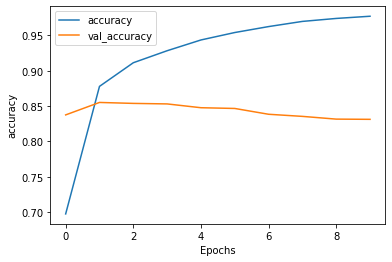

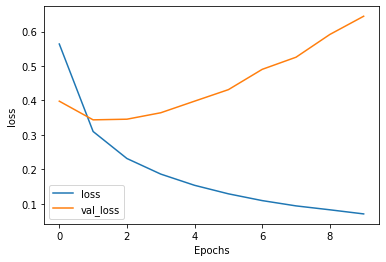

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")